# **Importing Modules and Libraries**

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path
import chardet

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# **Importing Datasets**

In [ ]:
pd.set_option('display.max_columns', None) #display all columns

In [ ]:
dtrain = pd.read_csv('../../../CSV/UNSWNB15/UNSW_NB15_testing-set.csv')
dtest = pd.read_csv('../../../CSV/UNSWNB15/UNSW_NB15_training-set.csv')

data = pd.concat([dtrain, dtest], ignore_index=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

In [ ]:
data = data.drop('id', axis=1)

In [ ]:
data['label'].value_counts()

label
1    164673
0     93000
Name: count, dtype: int64

In [ ]:
data.head(n=5)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  float64
 16  di

In [ ]:
data[data['service']=='-']

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0
5,0.380537,tcp,-,FIN,10,6,534,268,39.417980,254,252,1.011203e+04,4709.134766,2,1,39.928778,52.241000,2223.730342,82.550500,255,3984155503,1796040391,255,0.172934,0.119331,0.053603,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,0,0,0.005000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,52,0,0,0,1,2,2,1,1,2,0,0,0,2,1,0,Normal,0
257669,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,7,1,55.880051,143.700000,4798.130981,190.980813,255,1072535109,3284291478,255,0.173208,0.100191,0.073017,903,44,0,0,1,1,2,1,1,1,0,0,0,3,2,0,Normal,0
257670,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.720000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0
257671,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.732000,0.000000,10.954518,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0


In [ ]:
data['service'].replace('-',np.nan,inplace=True)

C:\Users\hhi20\AppData\Local\Temp\ipykernel_21116\1851727398.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['service'].replace('-',np.nan,inplace=True)


In [ ]:
data.isnull().sum()

dur                       0
proto                     0
service              141321
state                     0
spkts                     0
dpkts                     0
sbytes                    0
dbytes                    0
rate                      0
sttl                      0
dttl                      0
sload                     0
dload                     0
sloss                     0
dloss                     0
sinpkt                    0
dinpkt                    0
sjit                      0
djit                      0
swin                      0
stcpb                     0
dtcpb                     0
dwin                      0
tcprtt                    0
synack                    0
ackdat                    0
smean                     0
dmean                     0
trans_depth               0
response_body_len         0
ct_srv_src                0
ct_state_ttl              0
ct_dst_ltm                0
ct_src_dport_ltm          0
ct_dst_sport_ltm          0
ct_dst_src_ltm      

In [ ]:
data.shape

(257673, 44)

In [ ]:
data['proto'].value_counts()

proto
tcp       123041
udp        92701
unas       15599
arp         3846
ospf        3271
           ...  
rdp          131
netblt       131
igmp          48
icmp          15
rtp            1
Name: count, Length: 133, dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data['proto'].value_counts()

proto
udp    68851
tcp    47501
Name: count, dtype: int64

In [ ]:
data.shape

(116352, 44)

In [ ]:
data['label'].value_counts()

label
1    87239
0    29113
Name: count, dtype: int64

In [ ]:
data['attack_cat'].value_counts()

attack_cat
Generic           57956
Normal            29113
Exploits          21480
DoS                2508
Fuzzers            2266
Reconnaissance     2207
Analysis            564
Worms               148
Backdoor            110
Name: count, dtype: int64

In [ ]:
data['state'].value_counts()

state
INT    57894
FIN    47350
CON    10859
REQ      234
RST       14
ACC        1
Name: count, dtype: int64

In [ ]:
data

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
11,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,62,252,2.118251e+05,8152.559082,28,8,34.312868,75.092445,3253.278833,106.113453,255,1824722662,860716719,255,0.131140,0.052852,0.078288,909,79,0,0,2,1,1,1,1,2,0,0,0,1,1,0,Normal,0
15,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,254,0,2.760000e+08,0.000000,0,0,0.002000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,69,0,0,0,1,2,1,1,1,4,0,0,0,2,1,0,Normal,0
17,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,62,252,1.573347e+04,19494.048830,2,2,43.728444,47.669145,2124.837873,71.805867,255,3882971404,3084071099,255,0.120313,0.059201,0.061112,86,137,1,103,3,1,1,1,1,2,0,0,1,1,3,0,Normal,0
21,0.338017,tcp,http,FIN,10,6,998,268,44.376468,254,252,2.127704e+04,5301.508789,2,1,35.218111,56.579801,1928.550710,82.022258,255,2665974075,3521361798,255,0.154433,0.055109,0.099324,100,45,1,0,6,1,1,1,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256803,0.818276,tcp,http,FIN,60,14,68199,612,89.211954,254,252,6.556516e+05,5562.915039,27,1,13.441272,56.755152,1376.971154,76.224305,255,3137145926,3197614932,255,0.154745,0.080450,0.074295,1137,44,1,0,1,1,1,1,1,2,0,0,1,1,1,0,Normal,0
256807,0.825170,tcp,http,FIN,60,14,68199,612,88.466621,254,252,6.501739e+05,5516.438965,27,1,13.969984,57.166383,1389.032442,82.519703,255,3567303131,4168480199,255,0.113208,0.081998,0.031210,1137,44,1,0,1,1,45,1,1,1,0,0,1,1,1,0,Normal,0
256859,0.874942,tcp,http,FIN,60,14,68199,612,83.434101,254,252,6.131881e+05,5202.630371,27,1,14.591627,63.407922,1526.290325,97.276484,255,1516200001,1237225352,255,0.104980,0.050635,0.054345,1137,44,1,0,2,1,23,1,1,2,0,0,1,1,2,0,Normal,0
256881,0.740231,tcp,http,FIN,60,14,68199,612,98.617867,254,252,7.247792e+05,6149.432129,27,1,12.379305,53.710461,1300.964841,83.333812,255,860363568,341738851,255,0.082721,0.041986,0.040735,1137,44,1,0,3,1,25,1,1,3,0,0,1,1,3,0,Normal,0


In [ ]:
# Detect the encoding
with open('../../../CSV/UNSWNB15/UNSW-NB15_features.csv', 'rb') as file:
    print(chardet.detect(file.read()))

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [ ]:
features = pd.read_csv('../../../CSV/UNSWNB15/UNSW-NB15_features.csv', encoding='Windows-1252')

In [ ]:
features

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [ ]:
features['Type '] = features['Type '].str.lower()

In [ ]:
# selecting column names of all data types
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [ ]:
# selecting common column names from dataset and feature dataset
cols = data.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

In [ ]:
# Converting integer columns to numeric
for c in integer_names:
  pd.to_numeric(data[c])

In [ ]:
# Converting binary columns to numeric
for c in binary_names:
  pd.to_numeric(data[c])

In [ ]:
# Converting float columns to numeric
for c in float_names:
  pd.to_numeric(data[c])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116352 entries, 3 to 257535
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                116352 non-null  float64
 1   proto              116352 non-null  object 
 2   service            116352 non-null  object 
 3   state              116352 non-null  object 
 4   spkts              116352 non-null  int64  
 5   dpkts              116352 non-null  int64  
 6   sbytes             116352 non-null  int64  
 7   dbytes             116352 non-null  int64  
 8   rate               116352 non-null  float64
 9   sttl               116352 non-null  int64  
 10  dttl               116352 non-null  int64  
 11  sload              116352 non-null  float64
 12  dload              116352 non-null  float64
 13  sloss              116352 non-null  int64  
 14  dloss              116352 non-null  int64  
 15  sinpkt             116352 non-null  float64
 16  dinpkt 

In [ ]:
data

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
11,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,62,252,2.118251e+05,8152.559082,28,8,34.312868,75.092445,3253.278833,106.113453,255,1824722662,860716719,255,0.131140,0.052852,0.078288,909,79,0,0,2,1,1,1,1,2,0,0,0,1,1,0,Normal,0
15,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,254,0,2.760000e+08,0.000000,0,0,0.002000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,69,0,0,0,1,2,1,1,1,4,0,0,0,2,1,0,Normal,0
17,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,62,252,1.573347e+04,19494.048830,2,2,43.728444,47.669145,2124.837873,71.805867,255,3882971404,3084071099,255,0.120313,0.059201,0.061112,86,137,1,103,3,1,1,1,1,2,0,0,1,1,3,0,Normal,0
21,0.338017,tcp,http,FIN,10,6,998,268,44.376468,254,252,2.127704e+04,5301.508789,2,1,35.218111,56.579801,1928.550710,82.022258,255,2665974075,3521361798,255,0.154433,0.055109,0.099324,100,45,1,0,6,1,1,1,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256803,0.818276,tcp,http,FIN,60,14,68199,612,89.211954,254,252,6.556516e+05,5562.915039,27,1,13.441272,56.755152,1376.971154,76.224305,255,3137145926,3197614932,255,0.154745,0.080450,0.074295,1137,44,1,0,1,1,1,1,1,2,0,0,1,1,1,0,Normal,0
256807,0.825170,tcp,http,FIN,60,14,68199,612,88.466621,254,252,6.501739e+05,5516.438965,27,1,13.969984,57.166383,1389.032442,82.519703,255,3567303131,4168480199,255,0.113208,0.081998,0.031210,1137,44,1,0,1,1,45,1,1,1,0,0,1,1,1,0,Normal,0
256859,0.874942,tcp,http,FIN,60,14,68199,612,83.434101,254,252,6.131881e+05,5202.630371,27,1,14.591627,63.407922,1526.290325,97.276484,255,1516200001,1237225352,255,0.104980,0.050635,0.054345,1137,44,1,0,2,1,23,1,1,2,0,0,1,1,2,0,Normal,0
256881,0.740231,tcp,http,FIN,60,14,68199,612,98.617867,254,252,7.247792e+05,6149.432129,27,1,12.379305,53.710461,1300.964841,83.333812,255,860363568,341738851,255,0.082721,0.041986,0.040735,1137,44,1,0,3,1,25,1,1,3,0,0,1,1,3,0,Normal,0


# **Data Visualization**

## **Binary Classification**

In [ ]:
data['label'].value_counts()

label
1    87239
0    29113
Name: count, dtype: int64

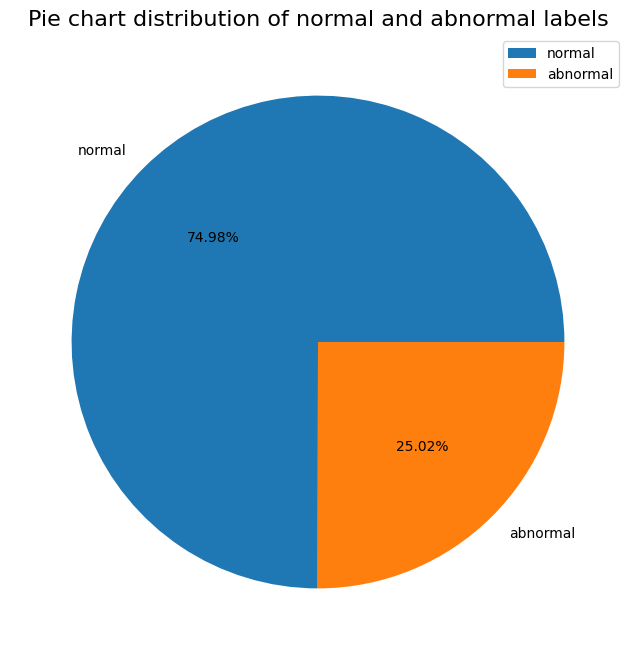

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(data['label'].value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.savefig('plots/Pie_chart_binary.png')
plt.show()

## **Multi-class Classification**

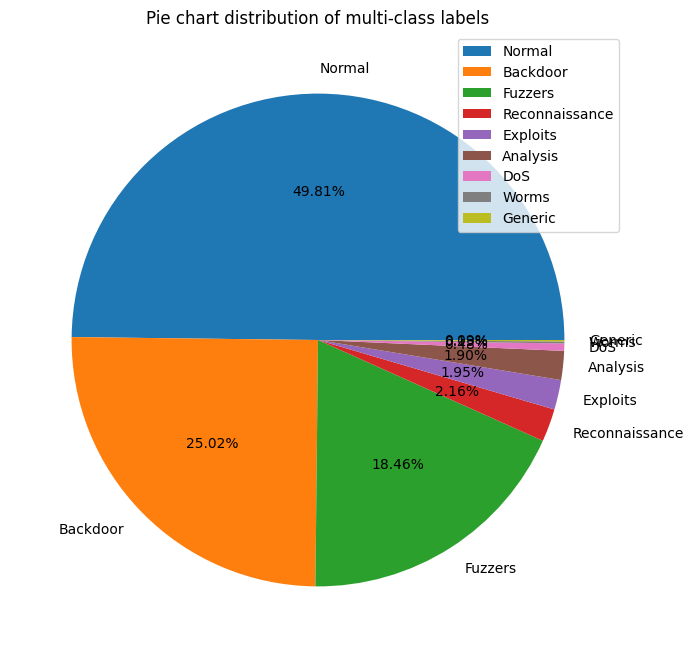

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(data.attack_cat.value_counts(),labels=data.attack_cat.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
plt.savefig('plots/Pie_chart_multi.png')
plt.show()

# **Data Normalization**


In [ ]:
# selecting numeric attributes columns from data
num_col = list(data.select_dtypes(include='number').columns)
# num_col.remove('id')
num_col.remove('label')
print(num_col)

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']


In [ ]:
# using minmax scaler for normalizing data
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [ ]:
# data before normalization
data.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
11,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,62,252,2.118251e+05,8152.559082,28,8,34.312868,75.092445,3253.278833,106.113453,255,1824722662,860716719,255,0.131140,0.052852,0.078288,909,79,0,0,2,1,1,1,1,2,0,0,0,1,1,0,Normal,0
15,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,254,0,2.760000e+08,0.000000,0,0,0.002000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,69,0,0,0,1,2,1,1,1,4,0,0,0,2,1,0,Normal,0
17,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,62,252,1.573347e+04,19494.048830,2,2,43.728444,47.669145,2124.837873,71.805867,255,3882971404,3084071099,255,0.120313,0.059201,0.061112,86,137,1,103,3,1,1,1,1,2,0,0,1,1,3,0,Normal,0
21,0.338017,tcp,http,FIN,10,6,998,268,44.376468,254,252,2.127704e+04,5301.508789,2,1,35.218111,56.579801,1928.550710,82.022258,255,2665974075,3521361798,255,0.154433,0.055109,0.099324,100,45,1,0,6,1,1,1,1,1,0,0,1,2,3,0,Normal,0


In [ ]:
# calling normalization() function
data = normalization(data.copy(),num_col)

In [ ]:
# data after normalization
data.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,2.802759e-02,tcp,ftp,FIN,0.001033,0.001089,0.000039,0.000053,0.000014,0.138393,0.992126,0.000001,0.000150,0.000188,0.000545,1.092583e-02,0.006449,0.000234,0.010777,1.0,0.257772,0.243888,1.0,0.000000,0.000000,0.000000,0.006777,0.042667,0.000000,0.000000,0.000000,0.166667,0.017241,0.0,0.0,0.034483,0.25,0.25,0.000000,0.016949,0.000000,0.0,Normal,0
11,3.488503e-02,tcp,smtp,FIN,0.005730,0.002541,0.003919,0.000151,0.000043,0.138393,0.992126,0.000092,0.000364,0.005264,0.001453,2.452283e-03,0.005367,0.002938,0.000229,1.0,0.424852,0.200410,1.0,0.087972,0.103000,0.054975,0.652108,0.052667,0.000000,0.000000,0.017241,0.166667,0.000000,0.0,0.0,0.017241,0.00,0.00,0.000000,0.000000,0.000000,0.0,Normal,0
15,3.333360e-08,udp,snmp,INT,0.000094,0.000000,0.000005,0.000000,0.500000,0.995536,0.000000,0.119792,0.000000,0.000000,0.000000,1.429367e-07,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.019578,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.0,0.0,0.051724,0.00,0.00,0.000000,0.016949,0.000000,0.0,Normal,0
17,6.559318e-03,tcp,http,FIN,0.000845,0.000726,0.000055,0.000075,0.000043,0.138393,0.992126,0.000007,0.000869,0.000376,0.000363,3.125199e-03,0.003407,0.001919,0.000155,1.0,0.904076,0.718098,1.0,0.080709,0.115373,0.042914,0.032380,0.091333,0.005814,0.000016,0.034483,0.166667,0.000000,0.0,0.0,0.017241,0.00,0.00,0.033333,0.000000,0.034483,0.0,Normal,0
21,5.633661e-03,tcp,http,FIN,0.000845,0.000545,0.000065,0.000018,0.000044,0.995536,0.992126,0.000009,0.000236,0.000376,0.000182,2.516980e-03,0.004044,0.001741,0.000177,1.0,0.620722,0.819917,1.0,0.103597,0.107399,0.069747,0.042922,0.030000,0.005814,0.000000,0.086207,0.166667,0.000000,0.0,0.0,0.000000,0.00,0.00,0.033333,0.016949,0.034483,0.0,Normal,0


# **One hot encoding**

In [ ]:
# # one-hot-encoding categorical attributes using pandas.get_dummies() function
# data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [ ]:
# data.head()

In [ ]:
# data = pd.concat([data, data_cat],axis=1)

In [ ]:
# data.shape

In [ ]:
# data.drop(columns=cat_col,inplace=True)

In [ ]:
# data.shape

In [ ]:
# To reverse the encoding for a single feature
# original_feature1_values = label_encoders['proto'].inverse_transform(data['proto'])

# **Label Encoding**

In [ ]:
num_col = data.select_dtypes(include='number').columns

# selecting categorical data attributes
cat_col = data.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['proto', 'service', 'state'], dtype='object')

In [ ]:
# creating a dataframe with only categorical attributes
data_cat = data[cat_col].copy()
data_cat.head()

,proto,service,state
3,tcp,ftp,FIN
11,tcp,smtp,FIN
15,udp,snmp,INT
17,tcp,http,FIN
21,tcp,http,FIN


In [ ]:
label_encoders = {}

# List of categorical features to encode
features_to_encode = ['proto', 'service', 'state']

# Apply LabelEncoder to each categorical feature
for feature in features_to_encode:
    label_encoders[feature] = LabelEncoder()
    data[feature] = label_encoders[feature].fit_transform(data[feature])

In [ ]:
data.shape

(116352, 44)

In [ ]:
data

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,2.802759e-02,0,2,2,0.001033,0.001089,0.000039,0.000053,0.000014,0.138393,0.992126,0.000001,0.000150,0.000188,0.000545,1.092583e-02,0.006449,0.000234,0.010777,1.0,0.257772,0.243888,1.0,0.000000,0.000000,0.000000,0.006777,0.042667,0.000000,0.000000,0.000000,0.166667,0.017241,0.0,0.0,0.034483,0.25,0.25,0.000000,0.016949,0.000000,0.0,Normal,0
11,3.488503e-02,0,8,2,0.005730,0.002541,0.003919,0.000151,0.000043,0.138393,0.992126,0.000092,0.000364,0.005264,0.001453,2.452283e-03,0.005367,0.002938,0.000229,1.0,0.424852,0.200410,1.0,0.087972,0.103000,0.054975,0.652108,0.052667,0.000000,0.000000,0.017241,0.166667,0.000000,0.0,0.0,0.017241,0.00,0.00,0.000000,0.000000,0.000000,0.0,Normal,0
15,3.333360e-08,1,9,3,0.000094,0.000000,0.000005,0.000000,0.500000,0.995536,0.000000,0.119792,0.000000,0.000000,0.000000,1.429367e-07,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.019578,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.0,0.0,0.051724,0.00,0.00,0.000000,0.016949,0.000000,0.0,Normal,0
17,6.559318e-03,0,4,2,0.000845,0.000726,0.000055,0.000075,0.000043,0.138393,0.992126,0.000007,0.000869,0.000376,0.000363,3.125199e-03,0.003407,0.001919,0.000155,1.0,0.904076,0.718098,1.0,0.080709,0.115373,0.042914,0.032380,0.091333,0.005814,0.000016,0.034483,0.166667,0.000000,0.0,0.0,0.017241,0.00,0.00,0.033333,0.000000,0.034483,0.0,Normal,0
21,5.633661e-03,0,4,2,0.000845,0.000545,0.000065,0.000018,0.000044,0.995536,0.992126,0.000009,0.000236,0.000376,0.000182,2.516980e-03,0.004044,0.001741,0.000177,1.0,0.620722,0.819917,1.0,0.103597,0.107399,0.069747,0.042922,0.030000,0.005814,0.000000,0.086207,0.166667,0.000000,0.0,0.0,0.000000,0.00,0.00,0.033333,0.016949,0.034483,0.0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256803,1.363804e-02,0,4,2,0.005543,0.001271,0.004746,0.000042,0.000089,0.995536,0.992126,0.000285,0.000248,0.005076,0.000182,9.606252e-04,0.004056,0.001243,0.000165,1.0,0.730425,0.744536,1.0,0.103807,0.156784,0.052171,0.823795,0.029333,0.005814,0.000000,0.000000,0.166667,0.000000,0.0,0.0,0.017241,0.00,0.00,0.033333,0.000000,0.000000,0.0,Normal,0
256807,1.375294e-02,0,4,2,0.005543,0.001271,0.004746,0.000042,0.000088,0.995536,0.992126,0.000282,0.000246,0.005076,0.000182,9.984114e-04,0.004086,0.001254,0.000178,1.0,0.830579,0.970593,1.0,0.075943,0.159801,0.021916,0.823795,0.029333,0.005814,0.000000,0.000000,0.166667,0.758621,0.0,0.0,0.000000,0.00,0.00,0.033333,0.000000,0.000000,0.0,Normal,0
256859,1.458248e-02,0,4,2,0.005543,0.001271,0.004746,0.000042,0.000083,0.995536,0.992126,0.000266,0.000232,0.005076,0.000182,1.042839e-03,0.004532,0.001378,0.000210,1.0,0.353019,0.288077,1.0,0.070423,0.098680,0.038162,0.823795,0.029333,0.005814,0.000000,0.017241,0.166667,0.379310,0.0,0.0,0.017241,0.00,0.00,0.033333,0.000000,0.017241,0.0,Normal,0
256881,1.233728e-02,0,4,2,0.005543,0.001271,0.004746,0.000042,0.000099,0.995536,0.992126,0.000315,0.000274,0.005076,0.000182,8.847282e-04,0.003839,0.001175,0.000180,1.0,0.200319,0.079571,1.0,0.055491,0.081824,0.028605,0.823795,0.029333,0.005814,0.000000,0.034483,0.166667,0.413793,0.0,0.0,0.034483,0.00,0.00,0.033333,0.000000,0.034483,0.0,Normal,0


In [ ]:
# Assuming 'label_encoders' is the dictionary of LabelEncoders for each feature
mappings_df_list = []

for feature, encoder in label_encoders.items():
    # Get the class mapping for each feature
    mappings = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    # Convert the mapping to a DataFrame
    mapping_df = pd.DataFrame(list(mappings.items()), columns=['Category', 'Encoded Number'])
    mapping_df['Feature'] = feature
    mappings_df_list.append(mapping_df)

# Concatenate all mappings into a single DataFrame
all_mappings_df = pd.concat(mappings_df_list, ignore_index=True)


In [ ]:
all_mappings_df

,Category,Encoded Number,Feature
0,tcp,0,proto
1,udp,1,proto
2,dhcp,0,service
3,dns,1,service
4,ftp,2,service
5,ftp-data,3,service
6,http,4,service
7,irc,5,service
8,pop3,6,service
9,radius,7,service


## **Binary Labels**

In [ ]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x==0 else 'abnormal'))

In [ ]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = data.copy()
bin_data['label'] = bin_label

In [ ]:
# label encoding (0,1) binary labels
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label

In [ ]:
le1.classes_

array(['abnormal', 'normal'], dtype=object)

In [ ]:
np.save("le1_classes.npy",le1.classes_,allow_pickle=True)

## **Multi-class Labels**

In [ ]:
# one-hot-encoding attack label
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.attack_cat)

In [ ]:
multi_data = pd.get_dummies(multi_data,columns=['attack_cat'])

In [ ]:
# label encoding (0,1,2,3,4,5,6,7,8) multi-class labels
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['label'] = enc_label

In [ ]:
le2.classes_

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Worms'], dtype=object)

In [ ]:
np.save("le2_classes.npy",le2.classes_,allow_pickle=True)

# **Correlation between features of dataset**

In [ ]:
num_col

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

In [ ]:
# num_col.append('label')

## **Correlation Matrix for Binary Labels**

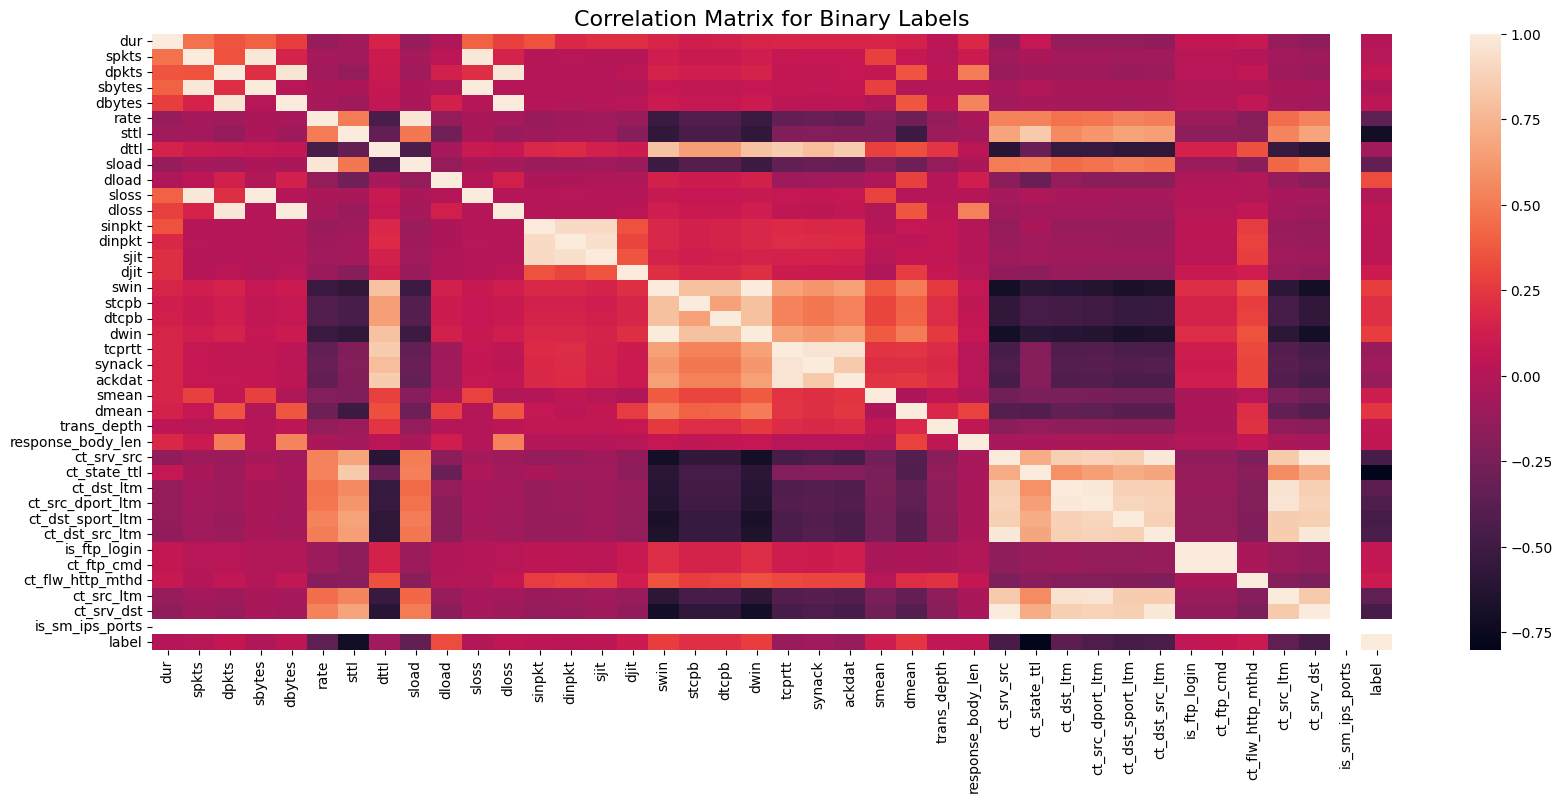

In [ ]:
# Correlation Matrix for Binary Labels
plt.figure(figsize=(20,8))
corr_bin = bin_data[num_col].corr()
sns.heatmap(corr_bin,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Binary Labels',fontsize=16)
plt.savefig('plots/correlation_matrix_bin.png')
plt.show()

## **Correlation Matrix for Multi-class Labels**

In [ ]:
num_col = list(multi_data.select_dtypes(include='number').columns)

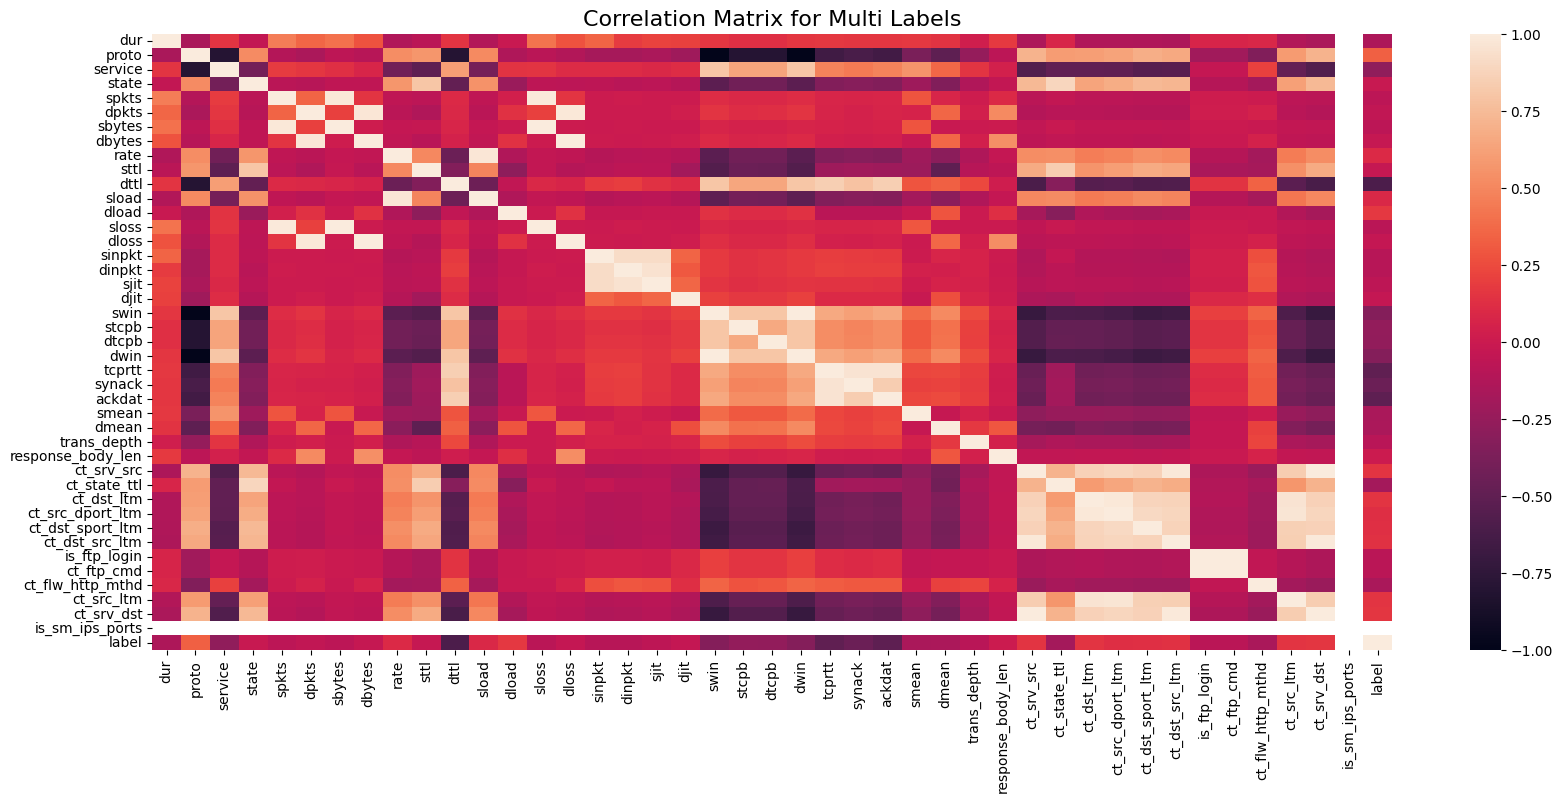

In [ ]:
# Correlation Matrix for Multi-class Labels
plt.figure(figsize=(20,8))
corr_multi = multi_data[num_col].corr()
sns.heatmap(corr_multi,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Multi Labels',fontsize=16)
plt.savefig('plots/correlation_matrix_multi.png')
plt.show()

# **Feature Selection**

## **Binary Labels**

In [ ]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute
corr_ybin = abs(corr_bin['label'])
highest_corr_bin = corr_ybin[corr_ybin >0.3]
highest_corr_bin.sort_values(ascending=True)

dload               0.324510
sload               0.346997
ct_src_ltm          0.358125
rate                0.358649
ct_dst_ltm          0.369918
ct_src_dport_ltm    0.429394
ct_dst_src_ltm      0.446370
ct_srv_dst          0.456873
ct_srv_src          0.459378
ct_dst_sport_ltm    0.472509
sttl                0.714563
ct_state_ttl        0.801607
label               1.000000
Name: label, dtype: float64

In [ ]:
# selecting attributes found by using pearson correlation coefficient
bin_cols = highest_corr_bin.index
bin_cols

Index(['rate', 'sttl', 'sload', 'dload', 'ct_srv_src', 'ct_state_ttl',
       'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'ct_src_ltm', 'ct_srv_dst', 'label'],
      dtype='object')

In [ ]:
# Binary labelled Dataset
bin_data = bin_data[bin_cols].copy()
bin_data

,rate,sttl,sload,dload,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,label
3,0.000014,0.138393,0.000001,0.000150,0.000000,0.166667,0.017241,0.0,0.0,0.034483,0.016949,0.000000,1
11,0.000043,0.138393,0.000092,0.000364,0.017241,0.166667,0.000000,0.0,0.0,0.017241,0.000000,0.000000,1
15,0.500000,0.995536,0.119792,0.000000,0.000000,0.333333,0.000000,0.0,0.0,0.051724,0.016949,0.000000,1
17,0.000043,0.138393,0.000007,0.000869,0.034483,0.166667,0.000000,0.0,0.0,0.017241,0.000000,0.034483,1
21,0.000044,0.995536,0.000009,0.000236,0.086207,0.166667,0.000000,0.0,0.0,0.000000,0.016949,0.034483,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256803,0.000089,0.995536,0.000285,0.000248,0.000000,0.166667,0.000000,0.0,0.0,0.017241,0.000000,0.000000,1
256807,0.000088,0.995536,0.000282,0.000246,0.000000,0.166667,0.758621,0.0,0.0,0.000000,0.000000,0.000000,1
256859,0.000083,0.995536,0.000266,0.000232,0.017241,0.166667,0.379310,0.0,0.0,0.017241,0.000000,0.017241,1
256881,0.000099,0.995536,0.000315,0.000274,0.034483,0.166667,0.413793,0.0,0.0,0.034483,0.000000,0.034483,1


### **Saving Prepared Dataset to Disk**

In [ ]:
bin_data.to_csv('./savedDatasets/bin_data.csv')

## **Multi-class Labels**

In [ ]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute
corr_ymulti = abs(corr_multi['label'])
highest_corr_multi = corr_ymulti[corr_ymulti >0.3]
highest_corr_multi.sort_values(ascending=True)

proto     0.330215
swin      0.330215
dwin      0.330234
synack    0.448737
tcprtt    0.500531
ackdat    0.512859
dttl      0.594611
label     1.000000
Name: label, dtype: float64

In [ ]:
# selecting attributes found by using pearson correlation coefficient
multi_cols = highest_corr_multi.index
multi_cols

Index(['proto', 'dttl', 'swin', 'dwin', 'tcprtt', 'synack', 'ackdat', 'label'], dtype='object')

In [ ]:
# Multi-class labelled Dataset
multi_data = multi_data[multi_cols].copy()

### **Saving Prepared Dataset to Disk**

In [ ]:
multi_data.to_csv('./savedDatasets/multi_data.csv')

# **MULTI-CLASS CLASSIFICATION**

## **Data Splitting**

In [ ]:
X = multi_data.drop(columns=['label'],axis=1)
Y = multi_data['label']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30, random_state=100)

## Convolutional Nueral Network (CNN)

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout
# from keras.utils import to_categorical
# from sklearn.model_selection import train_test_split
# import pandas as pd
# import numpy as np

# # Assuming multi_data is your DataFrame and the preprocessing steps you mentioned have been applied

# # Prepare the dataset
# X = multi_data.drop(columns=['label'], axis=1)
# Y = multi_data['label']
# Y_categorical = to_categorical(Y)
# X_train, X_test, y_train, y_test = train_test_split(X, Y_categorical, test_size=0.30, random_state=100)

# # Reshape X_train and X_test for CNN
# # This reshaping is hypothetical and may not be meaningful for your dataset
# X_train_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# # Define the CNN model
# model = Sequential()
# model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(64, kernel_size=3, activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(y_train.shape[1], activation='softmax'))

# # Compile the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Fit the model
# model.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, validation_split=0.2)

# # Evaluate the model
# y_pred_categorical = model.predict(X_test_reshaped)
# y_pred = np.argmax(y_pred_categorical, axis=1)
# y_test_labels = np.argmax(y_test, axis=1)
# print(classification_report(y_test_labels, y_pred))


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Assuming multi_data is your DataFrame and the preprocessing steps you mentioned have been applied

# Prepare the dataset
X = multi_data.drop(columns=['label'], axis=1)
Y = multi_data['label']
Y_categorical = to_categorical(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y_categorical, test_size=0.30, random_state=100)

# Reshape X_train and X_test for CNN
# This reshaping is hypothetical and may not be meaningful for your dataset
X_train_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', padding='same', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=2, activation='relu', padding='same'))
# The following MaxPooling1D layer can now operate without error
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
y_pred_categorical = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_categorical, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
print(classification_report(y_test_labels, y_pred))


Epoch 1/10
1019/1019 [==============================] - 5s 4ms/step - loss: 0.5619 - accuracy: 0.8484 - val_loss: 0.4317 - val_accuracy: 0.8859
Epoch 2/10
1019/1019 [==============================] - 4s 4ms/step - loss: 0.4266 - accuracy: 0.8866 - val_loss: 0.4205 - val_accuracy: 0.8859
Epoch 3/10
1019/1019 [==============================] - 4s 4ms/step - loss: 0.4190 - accuracy: 0.8866 - val_loss: 0.4206 - val_accuracy: 0.8859
Epoch 4/10
1019/1019 [==============================] - 4s 4ms/step - loss: 0.4149 - accuracy: 0.8866 - val_loss: 0.4136 - val_accuracy: 0.8859
Epoch 5/10
1019/1019 [==============================] - 4s 4ms/step - loss: 0.4116 - accuracy: 0.8866 - val_loss: 0.4180 - val_accuracy: 0.8859
Epoch 6/10
1019/1019 [==============================] - 4s 4ms/step - loss: 0.4105 - accuracy: 0.8869 - val_loss: 0.4110 - val_accuracy: 0.8861
Epoch 7/10
1019/1019 [==============================] - 3s 3ms/step - loss: 0.4084 - accuracy: 0.8869 - val_loss: 0.4110 - val_accuracy:

c:\Users\hhi20\anaconda3\envs\IDS\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hhi20\anaconda3\envs\IDS\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hhi20\anaconda3\envs\IDS\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
